In [202]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [675]:
t_final = 150
t_start = 0
dt = 0.1
n = int(t_final-t_start/dt)

#  External Influence Model

In [676]:
p = [0.1,0.2,0.3,0.4,1] # iim constant 
#q = 0.2 # eim constant 
Na = int(5000)# max number of potential users 
N0 = 0
alpha = p
N_1 = np.zeros(n)
N_2 = np.zeros(n)
N_3 = np.zeros(n)
N_4 = np.zeros(n)
N_5 = np.zeros(n)
N_1[0] = N0
N_2[0] = N0
N_3[0] = N0
N_4[0] = N0
N_5[0] = N0

In [677]:
for i in range(1,n):
    N_1[i] = N_1[i-1] + alpha[0]*(Na - N_1[i-1])*dt
for i in range(1,n):
    N_2[i] = N_2[i-1] + alpha[1]*(Na - N_2[i-1])*dt
for i in range(1,n):
    N_3[i] = N_3[i-1] + alpha[2]*(Na - N_3[i-1])*dt
for i in range(1,n):
    N_4[i] = N_4[i-1] + alpha[3]*(Na - N_4[i-1])*dt
for i in range(1,n):
    N_5[i] = N_5[i-1] + alpha[4]*(Na - N_5[i-1])*dt
    
    
def dN_dt(N, p, q):
    return (p + q * (N/Na)) * (Na - N)

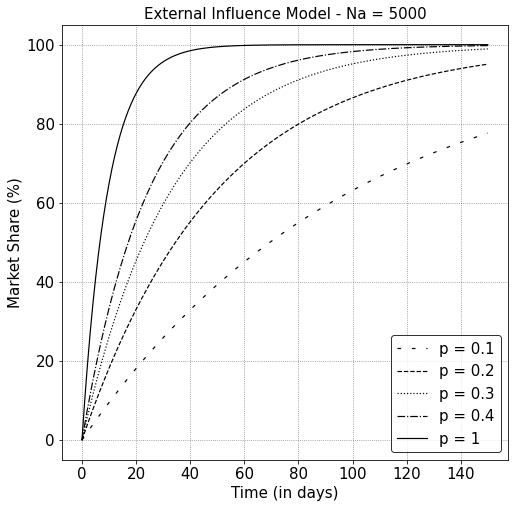

In [678]:
fig, ax = plt.subplots(figsize=[8,8])
t = np.linspace(0,t_final, int(n))
plt.plot(t, N_1*100/Na, label='p = {}'.format(p[0]),ls=(0, (3, 9)),lw=1.2, color='k')
plt.plot(t, N_2*100/Na, label='p = {}'.format(p[1]),ls='--',lw=1.2, color='k')
plt.plot(t, N_3*100/Na, label='p = {}'.format(p[2]),ls=':',lw=1.2, color='k')
plt.plot(t, N_4*100/Na, label='p = {}'.format(p[3]),ls='-.',lw=1.2, color='k')
plt.plot(t, N_5*100/Na, label='p = {}'.format(p[4]), ls='-' ,lw=1.2, color='k')
plt.xlabel('Time (in days)', fontsize=15, color='k')
plt.ylabel('Market Share (%)', fontsize=15, color='k')
plt.title('External Influence Model - Na = {}'.format(Na), fontsize=15, color='k')
plt.legend(fontsize=15, loc='best', edgecolor = 'k')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid( color='k', alpha=0.5, ls=':')
plt.show()

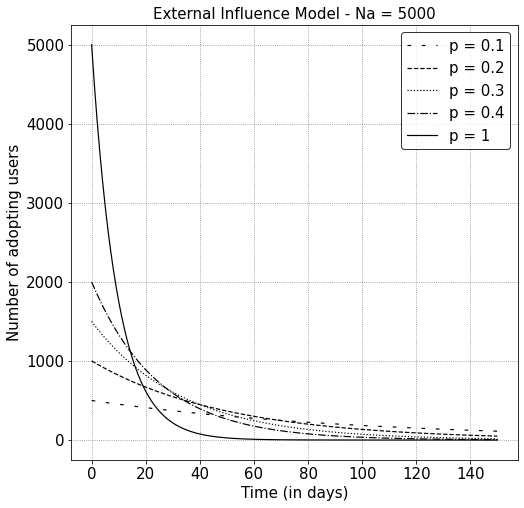

In [679]:
fig, ax = plt.subplots(figsize=[8,8])
t = np.linspace(0,t_final, int(n))
plt.plot(t, dN_dt(N_1,p[0],0), label='p = {}'.format(p[0]),ls=(0, (3, 9)),lw=1.2, color='k')
plt.plot(t, dN_dt(N_2,p[1],0), label='p = {}'.format(p[1]),ls='--',lw=1.2, color='k')
plt.plot(t, dN_dt(N_3,p[2],0), label='p = {}'.format(p[2]),ls=':',lw=1.2, color='k')
plt.plot(t, dN_dt(N_4,p[3],0), label='p = {}'.format(p[3]),ls='-.',lw=1.2, color='k')
plt.plot(t, dN_dt(N_5,p[4],0), label='p = {}'.format(p[4]), ls='-' ,lw=1.2, color='k')
plt.xlabel('Time (in days)', fontsize=15, color='k')
plt.ylabel('Number of adopting users', fontsize=15, color='k')
plt.title('External Influence Model - Na = {}'.format(Na), fontsize=15, color='k')
plt.legend(fontsize=15, loc='best', edgecolor = 'k')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid( color='k', alpha=0.5, ls=':')
plt.show()

# Internal Influence Model

In [680]:
#p = [0.1,0.2,0.3,0.4,1] # iim constant 
q = [0.3,0.4,0.6,0.7,1] # eim constant 
Na = int(1000)# max number of potential users 
N0 = 10
#alpha = q[0]*N0/Na
N_1 = np.zeros(n)
N_2 = np.zeros(n)
N_3 = np.zeros(n)
N_4 = np.zeros(n)
N_5 = np.zeros(n)
N_1[0] = N0
N_2[0] = N0
N_3[0] = N0
N_4[0] = N0
N_5[0] = N0


In [681]:
alpha = q[0]*N0/Na
for i in range(1,n):
    alpha = q[0]*N_1[i-1]/Na
    N_1[i] = N_1[i-1] + alpha*(Na - N_1[i-1])*dt
    
    
alpha = q[1]*N0/Na
for i in range(1,n):
    alpha = q[1]*N_2[i-1]/Na
    N_2[i] = N_2[i-1] + alpha*(Na - N_2[i-1])*dt
    
    
alpha = q[2]*N0/Na
for i in range(1,n):
    alpha = q[2]*N_3[i-1]/Na
    N_3[i] = N_3[i-1] + alpha*(Na - N_3[i-1])*dt
    
    
alpha = q[3]*N0/Na
for i in range(1,n):
    alpha = q[3]*N_4[i-1]/Na
    N_4[i] = N_4[i-1] + alpha*(Na - N_4[i-1])*dt
    
    
alpha = q[4]*N0/Na
for i in range(1,n):
    alpha = q[4]*N_5[i-1]/Na
    N_5[i] = N_5[i-1] + alpha*(Na - N_5[i-1])*dt
    
    

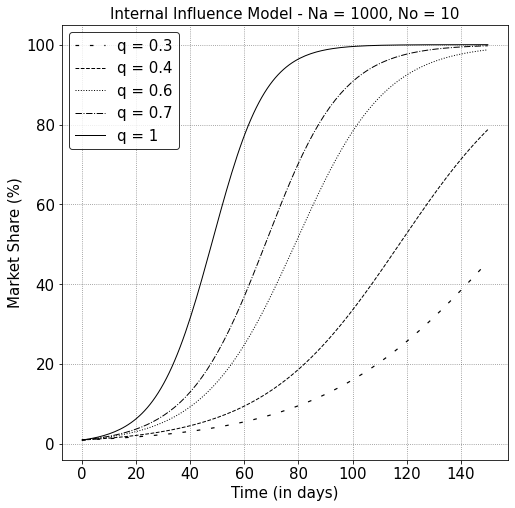

In [682]:
fig, ax = plt.subplots(figsize=[8,8])
t = np.linspace(0,t_final, int(n))
plt.plot(t, N_1*100/Na, label='q = {}'.format(q[0]),ls=(0, (3, 9)),lw=1.2, color='k')
plt.plot(t, N_2*100/Na, label='q = {}'.format(q[1]),ls='--',lw=1, color='k')
plt.plot(t, N_3*100/Na, label='q = {}'.format(q[2]),ls=':',lw=1, color='k')
plt.plot(t, N_4*100/Na, label='q = {}'.format(q[3]),ls='-.',lw=1, color='k')
plt.plot(t, N_5*100/Na, label='q = {}'.format(q[4]), ls='-' ,lw=1, color='k')
plt.xlabel('Time (in days)', fontsize=15, color='k')
plt.ylabel('Market Share (%)', fontsize=15, color='k')
plt.title('Internal Influence Model - Na = {}, No = {}'.format(Na, N0), fontsize=15, color='k')
plt.legend(fontsize=15, loc='best', edgecolor = 'k')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid( color='k', alpha=0.5, ls=':')
plt.show()

7.04842886143592


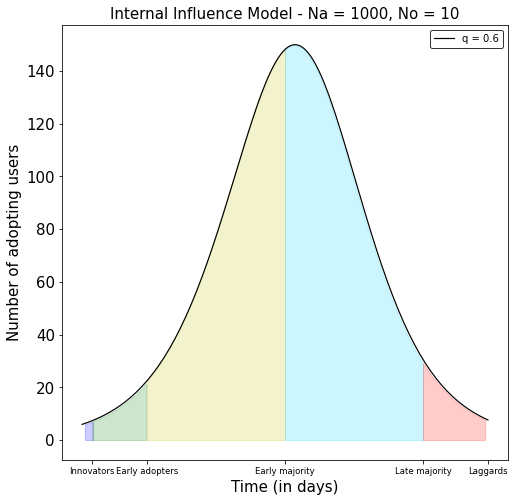

In [763]:
fig, ax = plt.subplots(figsize=[8,8])
t = np.linspace(0,t_final, int(n))
#plt.plot(t, dN_dt(N_1,0,q[0]), label='q = {}'.format(q[0]),ls=(0, (3, 9)),lw=1.2, color='k')
#plt.plot(t, dN_dt(N_2,0,q[1]), label='q = {}'.format(q[1]),ls='--',lw=1.2, color='k')
plt.plot(t, dN_dt(N_3,0,q[2]), label='q = {}'.format(q[2]),ls='-',lw=1.2, color='k')
#plt.plot(t, dN_dt(N_4,0,q[3]), label='q = {}'.format(q[3]),ls='-.',lw=1.2, color='k')
#plt.plot(t, dN_dt(N_5,0,q[4]), label='q = {}'.format(q[4]), ls='-' ,lw=1.2, color='k')
plt.xlabel('Time (in days)', fontsize=15, color='k')
plt.ylabel('Number of adopting users', fontsize=15, color='k')
plt.title('Internal Influence Model - Na = {}, No = {}'.format(Na,N0), fontsize=15, color='k')
print(dN_dt(N_3,0,q[2])[int(150*2.5/100)])
#plt.axvline(t_final*2.5/100, label='Innovators', ymax = dN_dt(N_3,0,q[2])[int(150*2.5/100)], color='b')
#plt.axvline(t_final*(13.5+2.5)/100, label='Early Adopters', color='g')
#plt.axvline(t_final*(13.5+2.5+34)/100, label='Early Majority', color='y')
#plt.axvline(t_final*(13.5+2.5+34+34)/100, label='Late Majority', color='#03cffc')
#plt.axvline(t_final*(13.5+2.5+34+34+16)/100, label='Laggards', color = 'r')
plt.legend(fontsize=10, loc='upper right', edgecolor = 'k')

x1 = np.arange(1,t_final*2.5/100+1)
y1 = dN_dt(N_3,0,q[2])[0:int(t_final*2.5/100)+1]

# Shade the area between y1 and line y=0
plt.fill_between(x1, y1, 0,
                 facecolor="orange", # The fill color
                 color='blue',       # The outline color
                 alpha=0.2)          # Transparency of the fill


x2 = np.arange(t_final*2.5/100,t_final*16/100)
y2 = dN_dt(N_3,0,q[2])[int(t_final*2.5/100) : int(t_final*16/100)]

# Shade the area between y1 and line y=0
plt.fill_between(x2, y2, 0,
                 facecolor="orange", # The fill color
                 color='g',       # The outline color
                 alpha=0.2)          # Transparency of the fill


x3 = np.arange(t_final*16/100,t_final*50/100+1)
y3 = dN_dt(N_3,0,q[2])[int(t_final*16/100) : int(t_final*50/100)+1]

# Shade the area between y1 and line y=0
plt.fill_between(x3, y3, 0,
                 facecolor="orange", # The fill color
                 color='y',       # The outline color
                 alpha=0.2)          # Transparency of the fill


x4 = np.arange(t_final*50/100,t_final*84/100+1)
y4 = dN_dt(N_3,0,q[2])[int(t_final*50/100) : int(t_final*84/100)+1]

# Shade the area between y1 and line y=0
plt.fill_between(x4, y4, 0,
                 facecolor="orange", # The fill color
                 color='#03cffc',       # The outline color
                 alpha=0.2)          # Transparency of the fill

x5 = np.arange(t_final*84/100,t_final)
y5 = dN_dt(N_3,0,q[2])[int(t_final*84/100) : int(t_final)]

# Shade the area between y1 and line y=0
plt.fill_between(x5, y5, 0,
                 facecolor="orange", # The fill color
                 color='r',       # The outline color
                 alpha=0.2)          # Transparency of the fill

ticks = [150*2.5/100, 150*16/100, 150*50/100, 150*84/100, 150]
labels = ['Innovators', 'Early adopters', 'Early majority', 'Late majority', 'Laggards']
plt.xticks(ticks = ticks, labels =labels ,fontsize=8.5, color='k')
plt.yticks(fontsize=15)
plt.grid( color='k', alpha=0, ls=':')
plt.show()

# Mixed Influence Model

In [548]:
t_final = 200
t_start = 0
dt = 0.1
n = int(t_final-t_start/dt)
pq = [[0.3,0.4],[0.3,0.8],[0.5,0.4], [0.5,0.8], [0.05,1]] # mim constant 
Na = int(1000)# max number of potential users 
N0 = 0
#alpha = q[0]*N0/Na
N_1 = np.zeros(n)
N_2 = np.zeros(n)
N_3 = np.zeros(n)
N_4 = np.zeros(n)
N_5 = np.zeros(n)
N_1[0] = N0
N_2[0] = N0
N_3[0] = N0
N_4[0] = N0
N_5[0] = N0

In [549]:

for i in range(1,n):
    alpha = pq[0][0] + pq[0][1]*N_1[i-1]/Na
    N_1[i] = N_1[i-1] + alpha*(Na - N_1[i-1])*dt
    
    

for i in range(1,n):
    alpha = pq[1][0] + pq[1][1]*N_2[i-1]/Na
    N_2[i] = N_2[i-1] + alpha*(Na - N_2[i-1])*dt
    
    

for i in range(1,n):
    alpha = pq[2][0] + pq[2][1]*N_3[i-1]/Na
    N_3[i] = N_3[i-1] + alpha*(Na - N_3[i-1])*dt
    
    

for i in range(1,n):
    alpha = pq[3][0] + pq[3][1]*N_4[i-1]/Na
    N_4[i] = N_4[i-1] + alpha*(Na - N_4[i-1])*dt
    
    

for i in range(1,n):
    alpha = pq[4][0] + pq[4][1]*N_5[i-1]/Na
    N_5[i] = N_5[i-1] + alpha*(Na - N_5[i-1])*dt
    
    

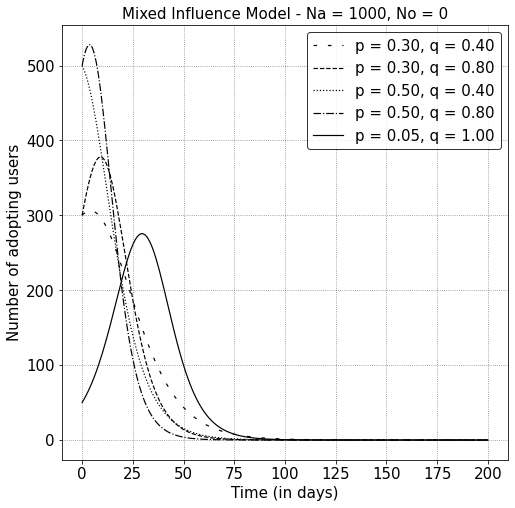

In [550]:
fig, ax = plt.subplots(figsize=[8,8])
t = np.linspace(t_start,t_final, int(n))
plt.plot(t, dN_dt(N_1,pq[0][0],pq[0][1]), label='p = {:.2f}, q = {:.2f}'.format(pq[0][0],pq[0][1]),ls=(0, (3, 9)),lw=1.2, color='k')
plt.plot(t, dN_dt(N_2,pq[1][0],pq[1][1]), label='p = {:.2f}, q = {:.2f}'.format(pq[1][0],pq[1][1]),ls='--',lw=1.2, color='k')
plt.plot(t, dN_dt(N_3,pq[2][0],pq[2][1]), label='p = {:.2f}, q = {:.2f}'.format(pq[2][0],pq[2][1]),ls=':',lw=1.2, color='k')
plt.plot(t, dN_dt(N_4,pq[3][0],pq[3][1]), label='p = {:.2f}, q = {:.2f}'.format(pq[3][0],pq[3][1]),ls='-.',lw=1.2, color='k')
plt.plot(t, dN_dt(N_5,pq[4][0],pq[4][1]), label='p = {:.2f}, q = {:.2f}'.format(pq[4][0],pq[4][1]), ls='-' ,lw=1.2, color='k')
plt.xlabel('Time (in days)', fontsize=15, color='k')
plt.ylabel('Number of adopting users', fontsize=15, color='k')
plt.title('Mixed Influence Model - Na = {}, No = {}'.format(Na,N0), fontsize=15, color='k')
plt.legend(fontsize=15, loc='best', edgecolor = 'k')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid( color='k', alpha=0.5, ls=':')
plt.show()

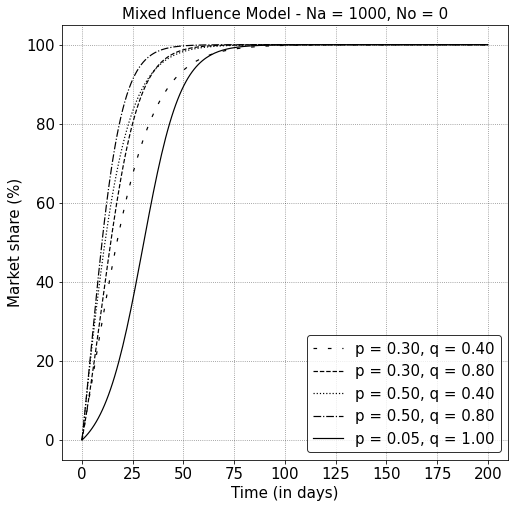

In [551]:
fig, ax = plt.subplots(figsize=[8,8])
t = np.linspace(0,t_final, int(n))
plt.plot(t, N_1*100/Na, label='p = {:.2f}, q = {:.2f}'.format(pq[0][0],pq[0][1]),ls=(0, (3, 9)),lw=1.2, color='k')
plt.plot(t, N_2*100/Na, label='p = {:.2f}, q = {:.2f}'.format(pq[1][0],pq[1][1]),ls='--',lw=1.2, color='k')
plt.plot(t, N_3*100/Na, label='p = {:.2f}, q = {:.2f}'.format(pq[2][0],pq[2][1]),ls=':',lw=1.2, color='k')
plt.plot(t, N_4*100/Na, label='p = {:.2f}, q = {:.2f}'.format(pq[3][0],pq[3][1]),ls='-.',lw=1.2, color='k')
plt.plot(t, N_5*100/Na, label='p = {:.2f}, q = {:.2f}'.format(pq[4][0],pq[4][1]), ls='-' ,lw=1.2, color='k')
plt.xlabel('Time (in days)', fontsize=15, color='k')
plt.ylabel('Market share (%)', fontsize=15, color='k')
plt.title('Mixed Influence Model - Na = {}, No = {}'.format(Na,N0), fontsize=15, color='k')
plt.legend(fontsize=15, loc='best', edgecolor = 'k')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid( color='k', alpha=0.5, ls=':')
plt.show()

# Mixed Influence Model - q as a function of time

In [767]:
t_final = 500
t_start = 0
dt = 0.1
n = int(t_final-t_start/dt)
pq = [[0.06,0.8], [0.06,0.8], [0.06,0.8], [0.06,0.8], [0.05,0.4], [0.05,0.4],[0.05,0.4],[0.05,0.4]] # mim constant 
Na = int(1000)# max number of potential users 
N0 = 10
beta = [-1, 0.1,5,10,-1, 0.1,5,10]
#alpha = q[0]*N0/Na
N_1 = np.zeros(n)
N_2 = np.zeros(n)
N_3 = np.zeros(n)
N_4 = np.zeros(n)
N_5 = np.zeros(n)
N_6 = np.zeros(n)
N_7 = np.zeros(n)
N_8 = np.zeros(n)

N_1[0] = N0
N_2[0] = N0
N_3[0] = N0
N_4[0] = N0
N_5[0] = N0
N_6[0] = N0
N_7[0] = N0
N_8[0] = N0

In [768]:

for i in range(1,n):
    alpha = pq[0][0] + pq[0][1]* pow(N_1[i-1]/Na, beta[0])*N_1[i-1]/Na
    N_1[i] = N_1[i-1] + alpha*(Na - N_1[i-1])*dt
    
    

for i in range(1,n):
    alpha = pq[1][0] + pq[1][1]*pow(N_2[i-1]/Na, beta[1])*N_2[i-1]/Na
    N_2[i] = N_2[i-1] + alpha*(Na - N_2[i-1])*dt
    
    

for i in range(1,n):
    alpha = pq[2][0] + pq[2][1]*pow(N_3[i-1]/Na, beta[2])*N_3[i-1]/Na
    N_3[i] = N_3[i-1] + alpha*(Na - N_3[i-1])*dt
    
    

for i in range(1,n):
    alpha = pq[3][0] + pq[3][1]*pow(N_4[i-1]/Na, beta[3])*N_4[i-1]/Na
    N_4[i] = N_4[i-1] + alpha*(Na - N_4[i-1])*dt
    
    
for i in range(1,n):
    alpha = pq[4][0] + pq[4][1]*pow(N_5[i-1]/Na, beta[4])*N_5[i-1]/Na
    N_5[i] = N_5[i-1] + alpha*(Na - N_5[i-1])*dt
    

for i in range(1,n):
    alpha = pq[5][0] + pq[5][1]*pow(N_6[i-1]/Na, beta[5])*N_6[i-1]/Na
    N_6[i] = N_6[i-1] + alpha*(Na - N_6[i-1])*dt
    
for i in range(1,n):
    alpha = pq[6][0] + pq[6][1]*pow(N_7[i-1]/Na, beta[6])*N_7[i-1]/Na
    N_7[i] = N_7[i-1] + alpha*(Na - N_7[i-1])*dt
    
for i in range(1,n):
    alpha = pq[7][0] + pq[7][1]*pow(N_8[i-1]/Na, beta[7])*N_8[i-1]/Na
    N_8[i] = N_8[i-1] + alpha*(Na - N_8[i-1])*dt
    

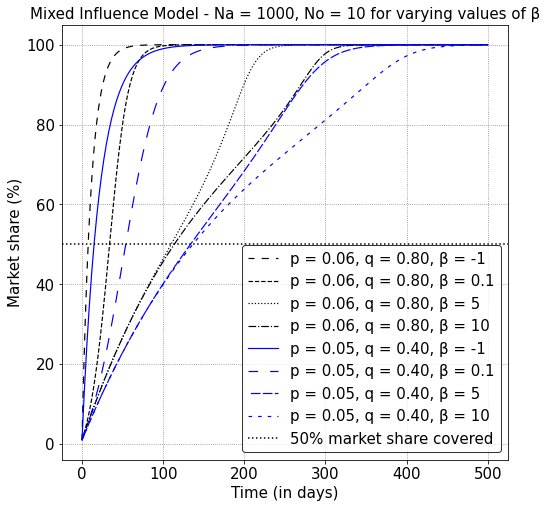

In [769]:
fig, ax = plt.subplots(figsize=[8,8])
t = np.linspace(0,t_final, int(n))
plt.plot(t, N_1*100/Na, label='p = {:.2f}, q = {:.2f}, \u03B2 = {}'.format(pq[0][0],pq[0][1], beta[0]),ls=(1, (6, 6)),lw=1.2, color='k')
plt.plot(t, N_2*100/Na, label='p = {:.2f}, q = {:.2f}, \u03B2 = {}'.format(pq[1][0],pq[1][1], beta[1]),ls='--',lw=1.2, color='k')
plt.plot(t, N_3*100/Na, label='p = {:.2f}, q = {:.2f}, \u03B2 = {}'.format(pq[2][0],pq[2][1], beta[2]),ls=':',lw=1.2, color='k')
plt.plot(t, N_4*100/Na, label='p = {:.2f}, q = {:.2f}, \u03B2 = {}'.format(pq[3][0],pq[3][1], beta[3]),ls='-.',lw=1.2, color='k')
plt.plot(t, N_5*100/Na, label='p = {:.2f}, q = {:.2f}, \u03B2 = {}'.format(pq[4][0],pq[4][1], beta[4]), ls='-' ,lw=1.2, color='b')
plt.plot(t, N_6*100/Na, label='p = {:.2f}, q = {:.2f}, \u03B2 = {}'.format(pq[5][0],pq[5][1], beta[5]), ls=(2, (10, 10)) ,lw=1.2, color='b')
plt.plot(t, N_7*100/Na, label='p = {:.2f}, q = {:.2f}, \u03B2 = {}'.format(pq[6][0],pq[6][1], beta[6]), ls=(8, (8, 2)) ,lw=1.2, color='b')
plt.plot(t, N_8*100/Na, label='p = {:.2f}, q = {:.2f}, \u03B2 = {}'.format(pq[7][0],pq[7][1], beta[7]), ls=(8, (3, 5)) ,lw=1.2, color='b')
plt.xlabel('Time (in days)', fontsize=15, color='k')
plt.ylabel('Market share (%)', fontsize=15, color='k')
plt.title('Mixed Influence Model - Na = {}, No = {} for varying values of \u03B2'.format(Na,N0), fontsize=15, color='k')
plt.axhline(y=50, color = 'k', ls = ':', label='50% market share covered')
plt.legend(fontsize=15, loc='best', edgecolor = 'k')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid( color='k', alpha=0.5, ls=':')
plt.show()

In [770]:
def dN_dt_beta(N, p, q, beta):
    return ((p + q * pow((N/Na), beta+1)) * (Na - N))

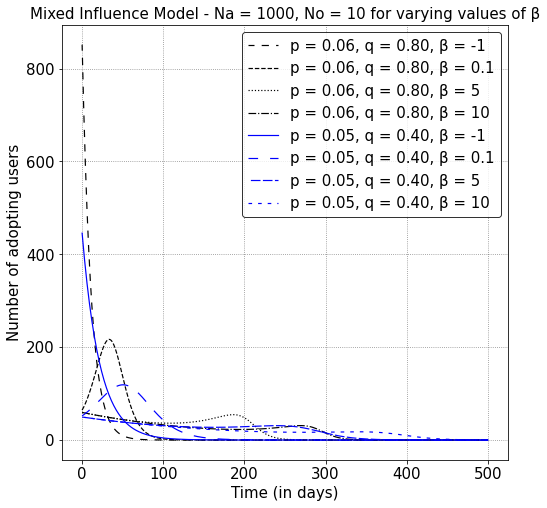

In [771]:
fig, ax = plt.subplots(figsize=[8,8])
t = np.linspace(0,t_final, int(n))
plt.plot(t, dN_dt_beta(N_1,pq[0][0],pq[0][1], beta[0]), label='p = {:.2f}, q = {:.2f}, \u03B2 = {}'.format(pq[0][0],pq[0][1], beta[0]),ls=(1, (6, 6)),lw=1.2, color='k')
plt.plot(t, dN_dt_beta(N_2,pq[1][0],pq[1][1], beta[1]), label='p = {:.2f}, q = {:.2f}, \u03B2 = {}'.format(pq[1][0],pq[1][1], beta[1]),ls='--',lw=1.2, color='k')
plt.plot(t, dN_dt_beta(N_3,pq[2][0],pq[2][1], beta[2]), label='p = {:.2f}, q = {:.2f}, \u03B2 = {}'.format(pq[2][0],pq[2][1], beta[2]),ls=':',lw=1.2, color='k')
plt.plot(t, dN_dt_beta(N_4,pq[3][0],pq[3][1], beta[3]), label='p = {:.2f}, q = {:.2f}, \u03B2 = {}'.format(pq[3][0],pq[3][1], beta[3]),ls='-.',lw=1.2, color='k')
plt.plot(t, dN_dt_beta(N_5,pq[4][0],pq[4][1], beta[4]), label='p = {:.2f}, q = {:.2f}, \u03B2 = {}'.format(pq[4][0],pq[4][1], beta[4]), ls='-' ,lw=1.2, color='b')
plt.plot(t, dN_dt_beta(N_6,pq[5][0],pq[5][1], beta[5]), label='p = {:.2f}, q = {:.2f}, \u03B2 = {}'.format(pq[5][0],pq[5][1], beta[5]), ls=(2, (10, 10)) ,lw=1.2, color='b')
plt.plot(t, dN_dt_beta(N_7,pq[6][0],pq[6][1], beta[6]), label='p = {:.2f}, q = {:.2f}, \u03B2 = {}'.format(pq[6][0],pq[6][1], beta[6]), ls=(8, (8, 2)) ,lw=1.2, color='b')
plt.plot(t, dN_dt_beta(N_8,pq[7][0],pq[7][1], beta[7]), label='p = {:.2f}, q = {:.2f}, \u03B2 = {}'.format(pq[7][0],pq[7][1], beta[7]), ls=(8, (3, 5)) ,lw=1.2, color='b')

plt.xlabel('Time (in days)', fontsize=15, color='k')
plt.ylabel('Number of adopting users', fontsize=15, color='k')
plt.title('Mixed Influence Model - Na = {}, No = {} for varying values of \u03B2'.format(Na,N0), fontsize=15, color='k')
plt.legend(fontsize=15, loc='best', edgecolor = 'k')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid( color='k', alpha=0.5, ls=':')
plt.show()